In [ ]:
%pylab inline

(540, 2500) (540,)
(100, 2500) (100,)


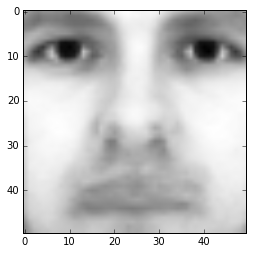

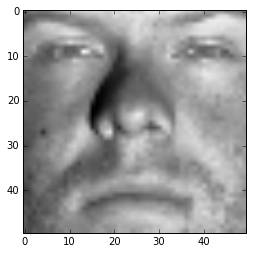

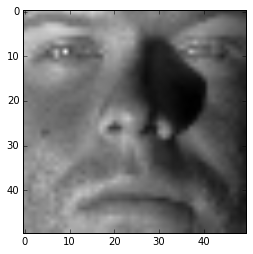

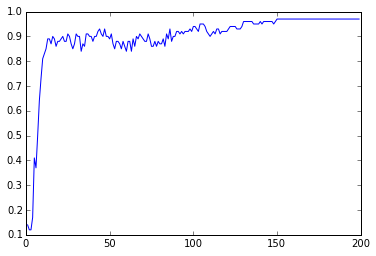

In [36]:
import numpy as np
from scipy import misc
from sklearn import linear_model as lm
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline


"""
Helper functions
"""
def read_data(fname):
    labels =  []
    data = []

    for line in open(fname):
        l = line.strip().split()
        im = misc.imread(l[0])
        data.append(im.reshape(2500,))
        if (len(l) > 1):
            labels.append(line.strip().split()[1])
    
    data, labels = np.array(data, dtype=float), np.array(labels, dtype=int)
    print data.shape, labels.shape
    return data, labels

def plot_image(X):
    """
    X is the image vector passed in which needs to be rehsaped
    """
    plt.imshow(X.reshape(50,50), cmap = cm.Greys_r)
    plt.show()
    
"""
Average Face. Compute the average face µ from the whole training set by summing up every
column in X then dividing by the number of faces. Display the average face as a grayscale
image.
"""
def avg_face(data):
    return (np.sum(data, axis = 0)/data.shape[0])

"""
Mean Subtraction. Subtract average face µ from every column in X. That is, xi := xi − µ,
where xi is the i-th column of X. Pick a face image after mean subtraction from the new X
and display that image in grayscale. Do the same thing for the test set Xtest using the precomputed
average face µ in (c).
"""
def sub_face(data, avg):
    return np.subtract(data, np.tile(avg, (data.shape[0], 1)))

"""
Eigenface. Perform Singular Value Decomposition (SVD) on training set X (X = UΣVT) to get
matrix VT, where each row of VT has the same dimension as the face image. We refer to vi,
the i-th row of VT, as i-th eigenface. Display the first 10 eigenfaces as 10 images in grayscale.
"""
def eigen_face(X, n) :
    """
    X - subtracted mean training data set
    n - number of eigen faces to be printed
    """
    U, sigma, Vt = np.linalg.svd(X, full_matrices=0)
    # print U.shape, sigma.shape, Vt.shape
    
    #for i in range(n) :
    #        plot_image(Vt[i,:])
    return U, sigma, Vt

def low_r_approx(X, r, U, sigma, Vt):
    """
    X - subtracted mean training data set X
    r - rank to be approximated passed in
    U, sigma, Vt - result of SVD decomposition
    """
    # rank-r approximation of X
    Xcap = np.dot(np.dot(U[:, :r], sigma[:r, :r]), Vt[:r, :])
    
    #now finding the F-norm
    xf = np.linalg.norm(np.subtract(X, Xcap), ord='fro')
    
    return xf

"""
Eigenface Feature. The top r eigenfaces VT[: r,:] = {v1, v2,..., vr }T
span an r -dimensional linear subspace of the original image space called face space,
whose origin is the average face µ, and whose axes are the eigenfaces {v1, v2,..., vr }.
Therefore, using the top r eigenfaces {v1, v2,..., vr }, we can represent a 
2500-dimensional face image z as an r -dimensional feature
vector f: f = VT[: r,:] z = [v1, v2,..., vr ]Tz. Write a function to generate
r -dimensional feature matrix F and Ftest for training images X and test
images Xtest, respectively (to get F, multiply X to the transpose of first r rows of VT
, F should have same number of rows as X and r columns;similarly for Xtest).
"""
def eigen_face_feature(X, r, Vt):
    return np.dot(X, np.transpose(Vt[:r, :]))

"""
Face Recognition. Extract training and test features for r = 10. Train a Logistic Regression
model using F and test on Ftest. Report the classification accuracy on the test set. Plot the
classification accuracy on the test set as a function of r when r = 1, 2,..., 200.
"""
def logistic_regression(Ftrain, Ftest):
    pass
    
if __name__ == '__main__':
    
    # reading in the data
    training_data, training_labels = read_data("./faces/train.txt")
    test_data, test_labels = read_data("./faces/test.txt")
    
    # generating average face (c)
    avg_test_data = avg_face(test_data)
    avg_train_data = avg_face(training_data)
    plot_image(avg_train_data)
    
    # generating subtracted face (d)
    sub_train_data = sub_face(training_data, avg_train_data)
    sub_test_data = sub_face(test_data, avg_train_data)  # Using the train test data average value
    plot_image(sub_train_data[1,:])
    plot_image(sub_test_data[1,:])
    
    # eigen face, passing in the subtractd mean
    U, sigma, Vt = eigen_face(sub_train_data, 10)
    
    # Low rank r is the function of r -> Xf
    sigma = np.diagflat(sigma)
    Xf = []
    #for i in range(1,200):
    #    Xf.append(low_r_approx(sub_train_data, i, U, sigma, Vt))
    #plt.plot(range(1,200), Xf)
    #plt.show()

    # Eigen face feature                  
    logreg = lm.LogisticRegression(C=1e5)
    classification_accuracy = []
    for i in range(1,200):
        train_feature = eigen_face_feature(sub_train_data, i, Vt)
        test_feature = eigen_face_feature(sub_test_data, i, Vt)
        logreg.fit(train_feature, training_labels)
        classification_accuracy.append(logreg.score(test_feature, test_labels))
    plt.plot(range(1,200), classification_accuracy)
    plt.show()
    